<a href="https://colab.research.google.com/github/manavbahuguna/manavbahuguna/blob/main/Outlier_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.shape

(1000, 3)

<ipython-input-18-7433e5fb17d0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-18-7433e5fb17d0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

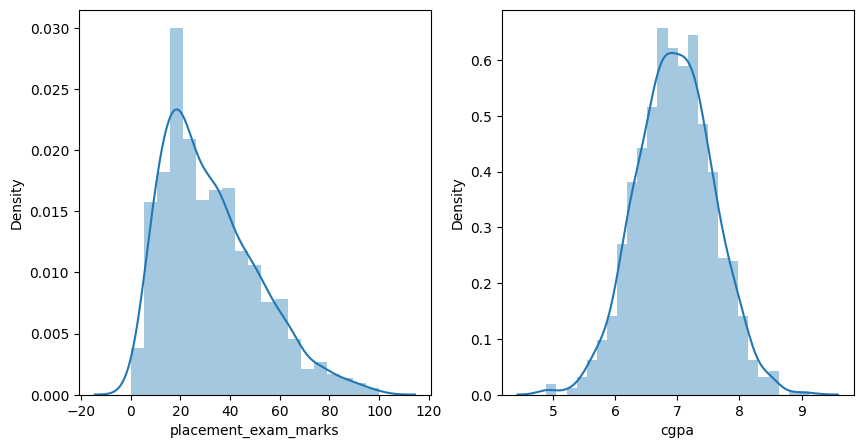

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.distplot(df['cgpa'])
plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])


Normal Distribution Outlier Removal

In [ ]:
print("Mean of cgpa is",df['cgpa'].mean())
print("STD of cgpa is",df['cgpa'].std())
print("Min of cgpa is",df['cgpa'].min())
print("Max of cgpa is",df['cgpa'].max())

Mean of cgpa is 6.96124
STD of cgpa is 0.6158978751323894
Min of cgpa is 4.89
Max of cgpa is 9.12


Finding the highest Boundary Values in Outlier Removal using Z-score method
(Boundary Values)

In [ ]:
 print('Highest Value allowed is ',df['cgpa'].mean() + 3*df['cgpa'].std() )
 print('Lowest Value allowed is ',df['cgpa'].mean() - 3*df['cgpa'].std() )

Highest Value allowed is  8.808933625397168
Lowest Value allowed is  5.113546374602832


Finding the Outliers

In [ ]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


Trimming Outliers

In [ ]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df.shape

(995, 3)

Approach 2 : Calculate the Z-score

In [ ]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df.head()


,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [ ]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [ ]:
df[df['cgpa_zscore'] < 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [ ]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


Instead of Trimming we can also use capping

In [ ]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [ ]:
upper_limit

8.808933625397168

In np.where we pass three condition
first is the condition
second is what happens if that condition is true
third is what happens if the condition is false



In [ ]:
df['cgpa'] =np.where (df['cgpa'] > upper_limit,upper_limit,np.where(df['cgpa'] < lower_limit,lower_limit,df['cgpa']))

In [ ]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.474376e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00


SKEWED Distribution Outlier Removal